Import Nessasary Libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the CSV

In [157]:
df = pd.read_csv(r"hotel_bookings.csv")

In [158]:
type(df)

pandas.core.frame.DataFrame

In [159]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


Begin Cleaning the data

In [160]:
df.shape

(119390, 32)

In [161]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Deal with features with a lot of missing values, we will drop there columns

In [162]:
df.drop(['agent','company'], axis=1, inplace=True)

In [163]:
df.shape

(119390, 30)

deal with features that have very few missing values

In [164]:
df['country'].value_counts().index[0]

'PRT'

In [165]:
df['country'].fillna(df['country'].value_counts().index[0], inplace=True)

In [166]:
df.fillna(0,inplace=True)

In [167]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Next we remove invalid data

It shouldnt be possible for the fields 'children' 'adults' and 'babies' to all be empty 

In [168]:
filter1 = (df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [169]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


remove all entries where they are all empty

In [170]:
data = df[~filter1]

In [171]:
df.shape

(119390, 30)

In [172]:
data.shape

(119210, 30)

Attempting to undrestabnd data

In [173]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [174]:
canceled_filter = data['is_canceled'] == 0

getting percentages of countries that book and dont cancel

In [175]:
data[canceled_filter]['country'].value_counts()/(len(data[canceled_filter]))

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [176]:
country_wise_data = data[canceled_filter]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


How Much do guest pay for a room each night

In [177]:
non_canceled_data = data[canceled_filter]

In [178]:
non_canceled_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price(EUR)')

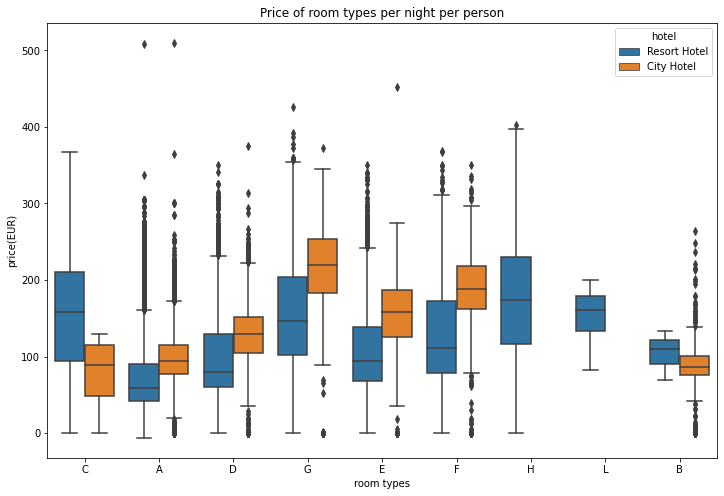

In [179]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "reserved_room_type", y = 'adr',hue='hotel',data = non_canceled_data)

plt.title('Price of room types per night per person')
plt.xlabel('room types')
plt.ylabel('price(EUR)')

Analize months that are most busy

In [180]:
non_canceled_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [181]:
non_canceled_data['hotel']

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 75011, dtype: object

In [182]:
resorts = non_canceled_data[non_canceled_data['hotel']=='Resort Hotel']
resorts

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [183]:
rush_resorts = resorts['arrival_date_month'].value_counts().reset_index()
rush_resorts.columns=['month','no_of_guests']
rush_resorts

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


Text(0, 0.5, 'Number Of Guests')

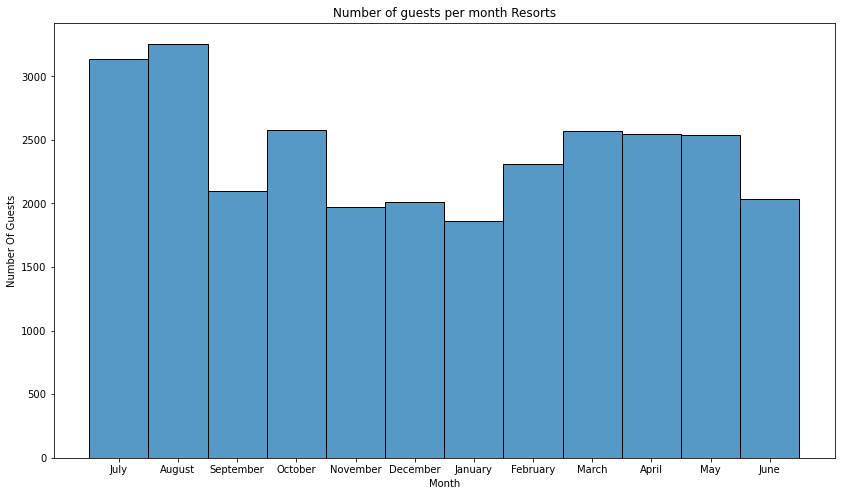

In [184]:
plt.figure(figsize=(14,8))
sns.histplot(x = "arrival_date_month",data=resorts )

plt.title('Number of guests per month Resorts')
plt.xlabel('Month')
plt.ylabel('Number Of Guests')

In [185]:
city_hotels = non_canceled_data[non_canceled_data['hotel']=='City Hotel']
city_hotels

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,A,1,No Deposit,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [186]:
rush_city = city_hotels['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city 

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


Text(0, 0.5, 'Number Of Guests')

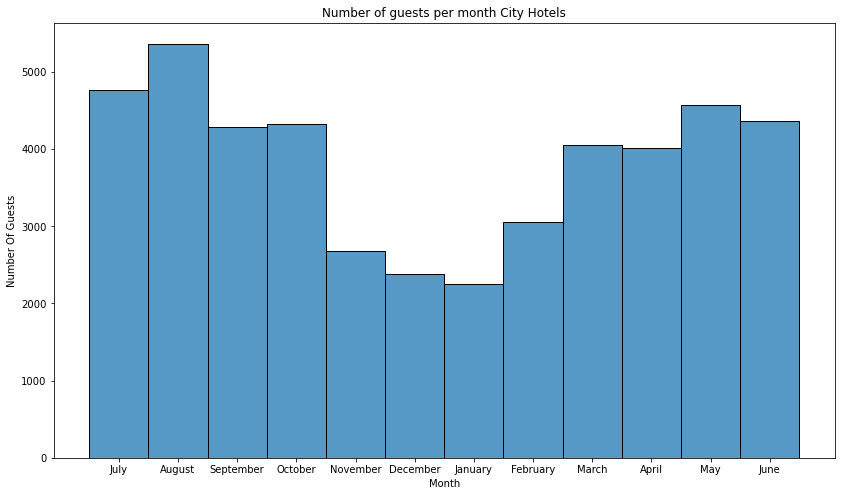

In [187]:
plt.figure(figsize=(14,8))
sns.histplot(x = "arrival_date_month",data=city_hotels )

plt.title('Number of guests per month City Hotels')
plt.xlabel('Month')
plt.ylabel('Number Of Guests')

In [188]:
rush_hotels = rush_resorts.merge(rush_city,on='month')
rush_hotels.columns=['month','no_of_guests_in_resorts','no_of_guests_in_city']
rush_hotels

,month,no_of_guests_in_resorts,no_of_guests_in_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


<AxesSubplot:>

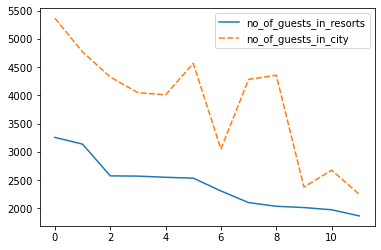

In [189]:
sns.lineplot(data=rush_hotels)

In [190]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
rush_hotels['month'] = pd.Categorical(rush_hotels['month'],categories=new_order,ordered=True)
final_rush_hotels = rush_hotels.sort_values('month')
final_rush_hotels

,month,no_of_guests_in_resorts,no_of_guests_in_city
11,January,1866,2249
6,February,2308,3051
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
8,June,2037,4358
1,July,3137,4770
0,August,3257,5367
7,September,2102,4283
2,October,2575,4326


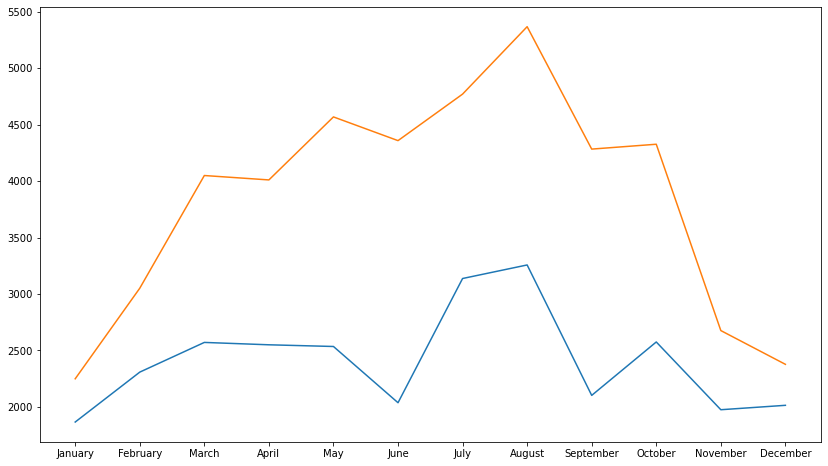

In [191]:
plt.figure(figsize=(14,8))
plt.plot(final_rush_hotels['month'],final_rush_hotels['no_of_guests_in_resorts'])
plt.plot(final_rush_hotels['month'],final_rush_hotels['no_of_guests_in_city'])
plt.show()


In [192]:
non_canceled_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [193]:
adr_resorts = resorts['arrival_date_month'].value_counts().reset_index()
adr_resorts.columns=['month','adr']
adr_city = city_hotels['arrival_date_month'].value_counts().reset_index()
adr_city.columns=['month','adr']


In [194]:
adr_resorts

,month,adr
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [195]:
adr_city

,month,adr
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


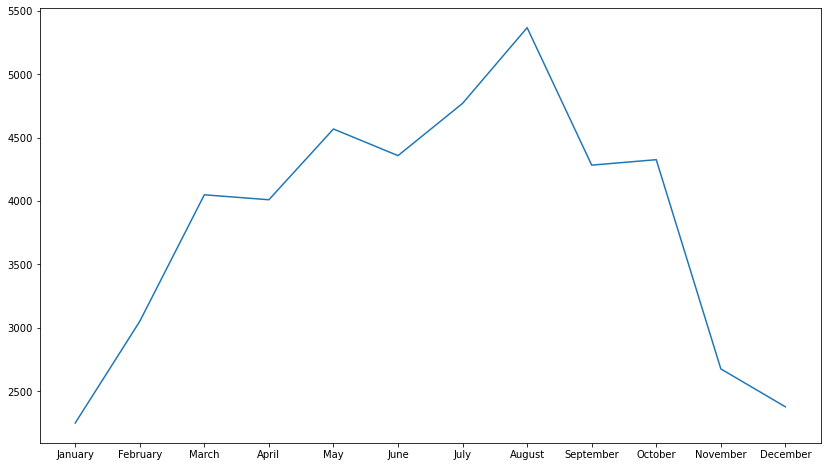

In [196]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
adr_city['month'] = pd.Categorical(adr_city['month'],categories=new_order,ordered=True)
final_adr_city = adr_city.sort_values('month')

plt.figure(figsize=(14,8))
plt.plot(final_adr_city['month'],final_adr_city['adr'])

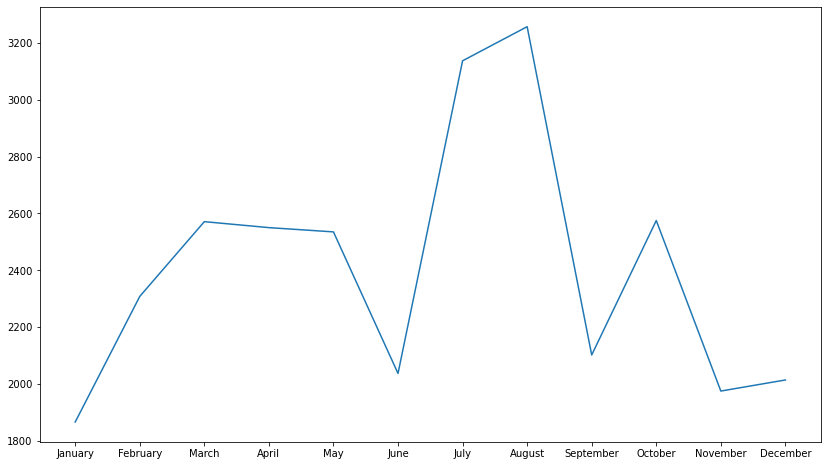

In [197]:
adr_resorts['month'] = pd.Categorical(adr_resorts['month'],categories=new_order,ordered=True)
final_adr_resorts = adr_resorts.sort_values('month')

plt.figure(figsize=(14,8))
plt.plot(final_adr_resorts['month'],final_adr_resorts['adr'])

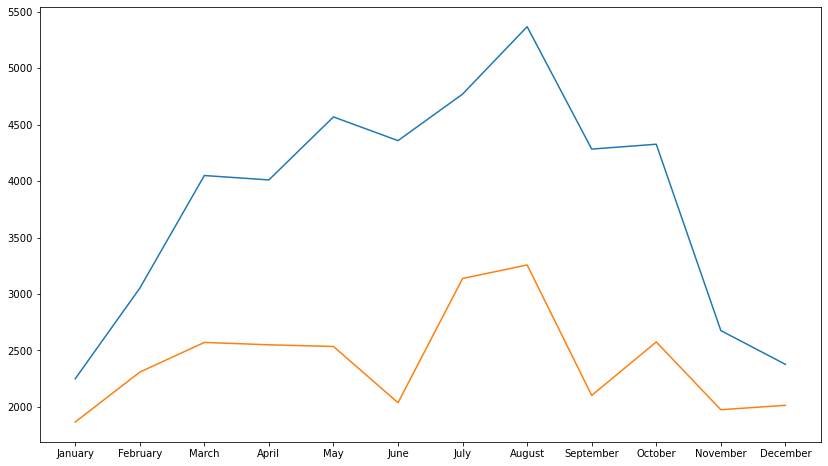

In [198]:
plt.figure(figsize=(14,8))
plt.plot(final_adr_city['month'],final_adr_city['adr'])
plt.plot(final_adr_resorts['month'],final_adr_resorts['adr'])
plt.show()

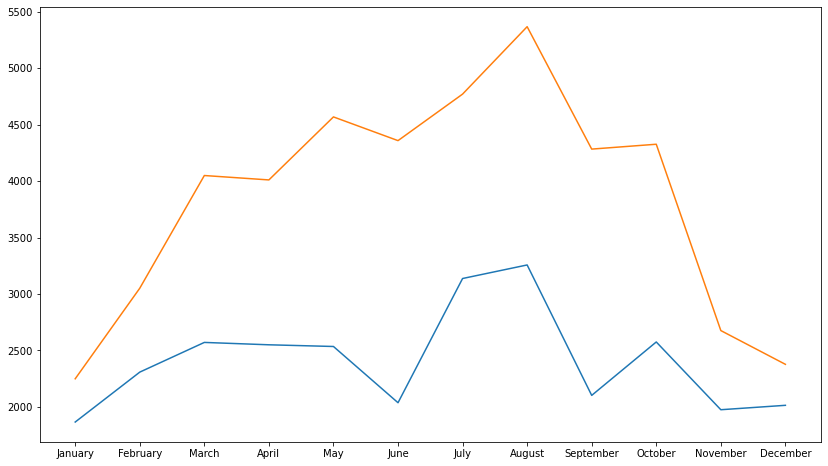

In [199]:
plt.figure(figsize=(14,8))
plt.plot(final_rush_hotels['month'],final_rush_hotels['no_of_guests_in_resorts'])
plt.plot(final_rush_hotels['month'],final_rush_hotels['no_of_guests_in_city'])
plt.show()

In [200]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'],categories=new_order,ordered=True)
data_sorted_month = data.sort_values('arrival_date_month')
data_sorted_month

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,...,D,0,No Deposit,0,Transient,27.00,0,0,Check-Out,1/15/2016
9944,Resort Hotel,1,17,2017,January,4,28,0,1,1,...,A,0,Non Refund,0,Transient-Party,32.00,0,0,Canceled,1/28/2017
9945,Resort Hotel,1,94,2017,January,4,28,0,1,2,...,A,0,No Deposit,0,Transient,42.00,0,1,Canceled,10/27/2016
9946,Resort Hotel,1,2,2017,January,4,28,0,1,2,...,E,0,No Deposit,0,Transient,76.00,0,1,Canceled,1/28/2017
9947,Resort Hotel,1,17,2017,January,4,28,0,1,2,...,A,0,Non Refund,0,Transient-Party,36.00,0,0,Canceled,1/11/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61218,City Hotel,1,60,2016,December,50,4,2,5,2,...,A,0,No Deposit,0,Transient,85.75,0,1,Canceled,10/25/2016
61219,City Hotel,1,35,2016,December,50,4,2,5,2,...,A,2,No Deposit,0,Transient,74.80,0,2,Canceled,11/25/2016
61220,City Hotel,1,31,2016,December,50,4,5,10,1,...,A,0,No Deposit,0,Transient,66.29,0,1,Canceled,11/18/2016
61222,City Hotel,1,28,2016,December,50,4,2,3,2,...,A,0,No Deposit,0,Transient,74.80,0,1,Canceled,11/15/2016


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

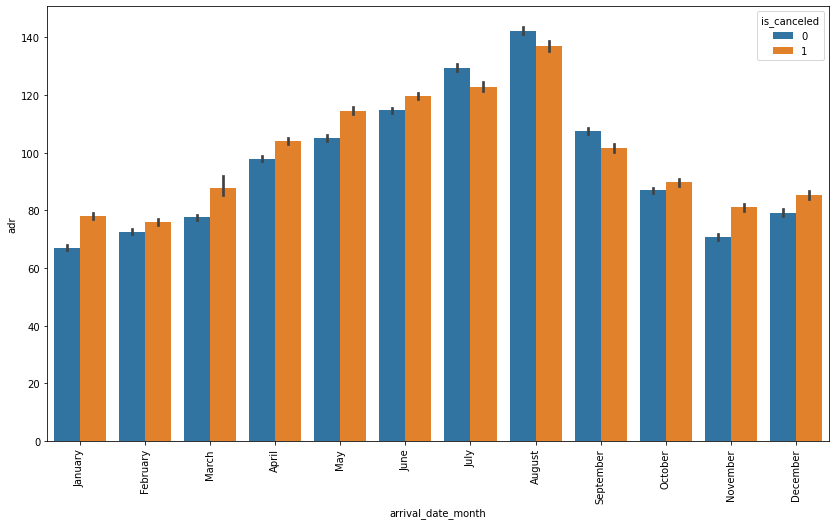

In [201]:
plt.figure(figsize=(14,8))
sns.barplot(x='arrival_date_month',y='adr',data=data_sorted_month,hue='is_canceled')
plt.xticks(rotation="vertical")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

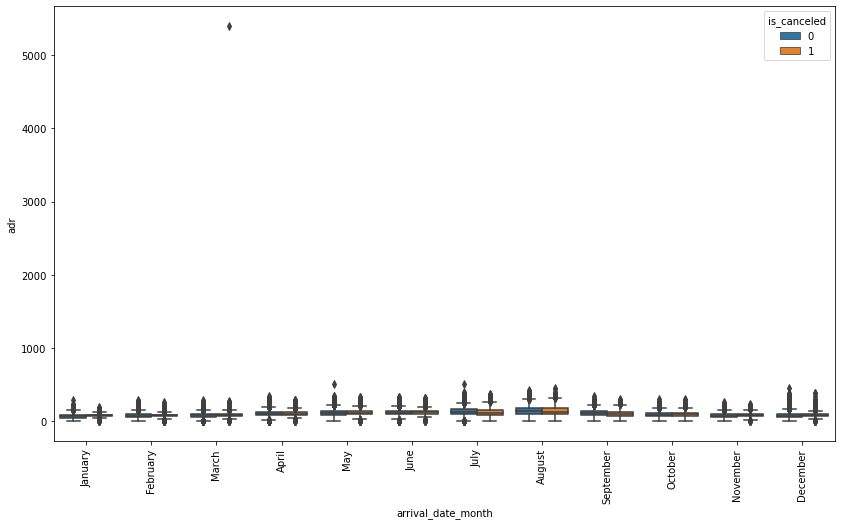

In [202]:
plt.figure(figsize=(14,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data_sorted_month,hue='is_canceled')
plt.xticks(rotation="vertical")

(0.0, 600.0)

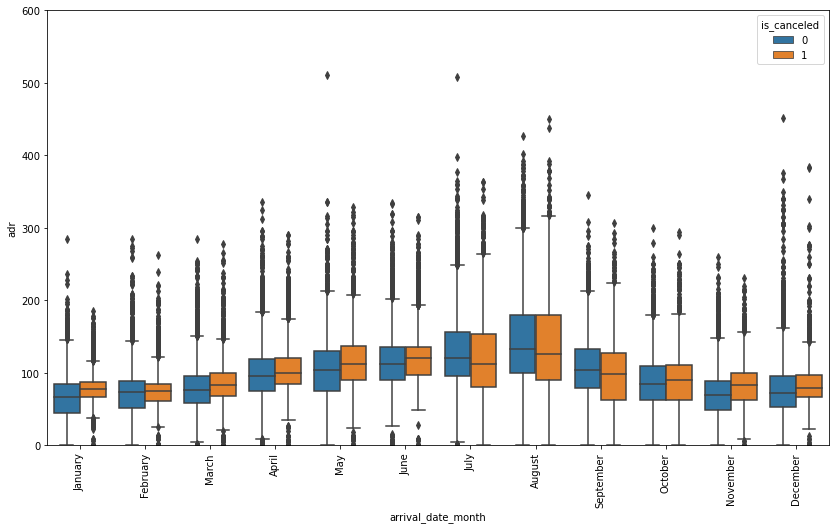

In [203]:
plt.figure(figsize=(14,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data_sorted_month,hue='is_canceled')
plt.xticks(rotation="vertical")

plt.ylim(0,600)

Anaylize what days of the week bookings are made, weekdays, weekends, both

In [204]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [205]:
pd.crosstab(index=data['stays_in_weekend_nights'], columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
def week_function(row):
    feature1 = 'stays_in_weekend_nights'
    feature2 = 'stays_in_week_nights'
    
    if row[feature1] == 0 and row[feature2] > 0:
        return 'stay_just_week'
    elif row[feature1] > 0 and row[feature2] == 0:
        return 'stay_just_weekend'
    elif row[feature1] > 0 and row[feature2] > 0:
        return 'stay_week_and_weekend'
    else:
        return 'invalid_data' 

In [207]:
data['weekend_or_weekday'] = data.apply(week_function,axis=1)

In [208]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015,invalid_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015,invalid_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_week
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_week
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015,stay_just_week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017,stay_week_and_weekend
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017,stay_week_and_weekend
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017,stay_week_and_weekend
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017,stay_week_and_weekend


In [209]:
data['weekend_or_weekday'].value_counts()

stay_week_and_weekend    60388
stay_just_week           51250
stay_just_weekend         6927
invalid_data               645
Name: weekend_or_weekday, dtype: int64

In [210]:
data.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday   
January             invalid_data               50
                    stay_just_week           3075
                    stay_just_weekend         457
                    stay_week_and_weekend    2339
February            invalid_data               54
                    stay_just_week           3796
                    stay_just_weekend         533
                    stay_week_and_weekend    3669
March               invalid_data               52
                    stay_just_week           4512
                    stay_just_weekend         499
                    stay_week_and_weekend    4705
April               invalid_data               33
                    stay_just_week           4420
                    stay_just_weekend         601
                    stay_week_and_weekend    6024
May                 invalid_data               76
                    stay_just_week           5197
                    stay_just_weekend         788
        

In [211]:
week_data_by_month = data.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack()

In [212]:
week_data_by_month

weekend_or_weekday,invalid_data,stay_just_week,stay_just_weekend,stay_week_and_weekend
arrival_date_month,,,,
January,50,3075,457,2339
February,54,3796,533,3669
March,52,4512,499,4705
April,33,4420,601,6024
May,76,5197,788,5719
June,38,4942,554,5395
July,58,4528,621,7437
August,49,5221,646,7945
September,23,4531,652,5294


<AxesSubplot:xlabel='arrival_date_month'>

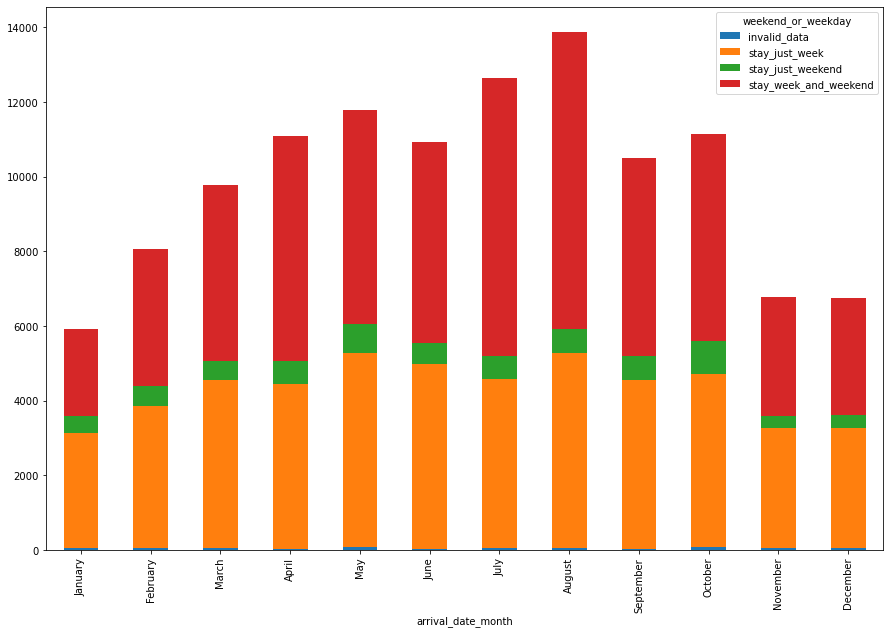

In [213]:
week_data_by_month.plot(kind='bar',stacked=True,figsize=(15,10))

creating useful features for model and reducing features

In [214]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [215]:
def family(row):
    if row['adults'] > 0 and (row['children'] > 0 or row['babies']>0):
        return 1
    else:
        return 0 
    

In [216]:
data['is_family'] = data.apply(family,axis=1)

In [217]:
data['total_customers'] = data['adults'] + data['children'] + data['babies']

In [218]:
data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [219]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday,is_family,total_customers,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,invalid_data,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,invalid_data,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_week,0,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_week,0,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_week,0,2.0,2


In [220]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday',
       'is_family', 'total_customers', 'total_nights'],
      dtype='object')

In [221]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [222]:
dict1={'No Deposit':0,'Refundable':1,'Non Refund':0}

In [223]:
data['deposit_given'] = data['deposit_type'].map(dict1)

In [224]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday',
       'is_family', 'total_customers', 'total_nights', 'deposit_given'],
      dtype='object')

In [225]:
data.drop(columns=['adults', 'children', 'babies','deposit_type'],axis=1,inplace=True)

In [226]:
data.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday,is_family,total_customers,total_nights,deposit_given
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,0.00,0,0,Check-Out,7/1/2015,invalid_data,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,0.00,0,0,Check-Out,7/1/2015,invalid_data,0,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,75.00,0,0,Check-Out,7/2/2015,stay_just_week,0,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,75.00,0,0,Check-Out,7/2/2015,stay_just_week,0,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,98.00,0,1,Check-Out,7/3/2015,stay_just_week,0,2.0,2,0
5,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,98.00,0,1,Check-Out,7/3/2015,stay_just_week,0,2.0,2,0
6,Resort Hotel,0,0,2015,July,27,1,0,2,BB,...,107.00,0,0,Check-Out,7/3/2015,stay_just_week,0,2.0,2,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,FB,...,103.00,0,1,Check-Out,7/3/2015,stay_just_week,0,2.0,2,0
8,Resort Hotel,1,85,2015,July,27,1,0,3,BB,...,82.00,0,1,Canceled,5/6/2015,stay_just_week,0,2.0,3,0
9,Resort Hotel,1,75,2015,July,27,1,0,3,HB,...,105.50,0,0,Canceled,4/22/2015,stay_just_week,0,2.0,3,0


Feature Encode

In [227]:
data.dtypes

hotel                               object
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
meal                                object
country                             object
market_segment                      object
distribution_channel                object
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                  object
assigned_room_type                  object
booking_changes                      int64
days_in_waiting_list                 int64
customer_type                       object
adr                                float64
required_car_parking_spaces          int64
total_of_sp

In [228]:
cate_features = [col for col in data.columns if data[col].dtype == 'object']
cate_features

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'weekend_or_weekday']

In [229]:
num_features = [col for col in data.columns if data[col].dtype != 'object']
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customers',
 'total_nights',
 'deposit_given']

In [230]:
data[cate_features]

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,invalid_data
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,invalid_data
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015,stay_just_week
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015,stay_just_week
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015,stay_just_week
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,BEL,Offline TA/TO,TA/TO,A,A,Transient,Check-Out,9/6/2017,stay_week_and_weekend
119386,City Hotel,BB,FRA,Online TA,TA/TO,E,E,Transient,Check-Out,9/7/2017,stay_week_and_weekend
119387,City Hotel,BB,DEU,Online TA,TA/TO,D,D,Transient,Check-Out,9/7/2017,stay_week_and_weekend
119388,City Hotel,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,9/7/2017,stay_week_and_weekend


Mean Encoding, replace the feature with the mean of its catagorical value

In [231]:
data.groupby(['hotel'])['is_canceled'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: is_canceled, dtype: float64

In [232]:
data_cat = data[cate_features]

In [233]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [234]:
data_cat['cancellation'] = data['is_canceled']

In [235]:
data_cat.head(5)

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday,cancellation
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,invalid_data,0
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,invalid_data,0
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015,stay_just_week,0
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015,stay_just_week,0
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015,stay_just_week,0


In [236]:
cols = data_cat.columns

In [237]:
cols

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'customer_type',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday',
       'cancellation'],
      dtype='object')

In [238]:
cols = cols[0:-1]

In [239]:
cols

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'customer_type',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [240]:
for col in cols:
    dict2 = data_cat.groupby([col])['cancellation'].mean()
    data_cat[col] = data_cat[col].map(dict2)

In [241]:
data_cat

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday,cancellation
0,0.277674,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0.035659,0
1,0.277674,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0.035659,0
2,0.277674,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.0,0.985075,0.379746,0
3,0.277674,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0.0,0.985075,0.379746,0
4,0.277674,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.522876,0.379746,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.374106,0.202391,0.343313,0.410598,0.391567,0.445055,0.407864,0.0,0.000000,0.378171,0
119386,0.417859,0.374106,0.185848,0.367590,0.410598,0.292683,0.251603,0.407864,0.0,0.000000,0.378171,0
119387,0.417859,0.374106,0.167193,0.367590,0.410598,0.318108,0.251373,0.407864,0.0,0.000000,0.378171,0
119388,0.417859,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.000000,0.378171,0


In [242]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0,342,2015,July,27,1,0,0,0,0,0,3,0,0.00,0,0,0,2.0,0,0
1,0,737,2015,July,27,1,0,0,0,0,0,4,0,0.00,0,0,0,2.0,0,0
2,0,7,2015,July,27,1,0,1,0,0,0,0,0,75.00,0,0,0,1.0,1,0
3,0,13,2015,July,27,1,0,1,0,0,0,0,0,75.00,0,0,0,1.0,1,0
4,0,14,2015,July,27,1,0,2,0,0,0,0,0,98.00,0,1,0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,0,0,0,0,0,96.14,0,0,0,2.0,7,0
119386,0,102,2017,August,35,31,2,5,0,0,0,0,0,225.43,0,2,0,3.0,7,0
119387,0,34,2017,August,35,31,2,5,0,0,0,0,0,157.71,0,4,0,2.0,7,0
119388,0,109,2017,August,35,31,2,5,0,0,0,0,0,104.40,0,0,0,2.0,7,0


In [243]:
data = pd.concat([data[num_features],data_cat],axis=1)

In [244]:
data

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,...,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday,cancellation
0,0,342,2015,July,27,1,0,0,0,0,...,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0.035659,0
1,0,737,2015,July,27,1,0,0,0,0,...,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0.035659,0
2,0,7,2015,July,27,1,0,1,0,0,...,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.0,0.985075,0.379746,0
3,0,13,2015,July,27,1,0,1,0,0,...,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0.0,0.985075,0.379746,0
4,0,14,2015,July,27,1,0,2,0,0,...,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.522876,0.379746,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,0,0,...,0.202391,0.343313,0.410598,0.391567,0.445055,0.407864,0.0,0.000000,0.378171,0
119386,0,102,2017,August,35,31,2,5,0,0,...,0.185848,0.367590,0.410598,0.292683,0.251603,0.407864,0.0,0.000000,0.378171,0
119387,0,34,2017,August,35,31,2,5,0,0,...,0.167193,0.367590,0.410598,0.318108,0.251373,0.407864,0.0,0.000000,0.378171,0
119388,0,109,2017,August,35,31,2,5,0,0,...,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.000000,0.378171,0


In [245]:
data.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customers', 'total_nights', 'deposit_given', 'hotel', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'customer_type',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday',
       'cancellation'],
      dtype='object')

In [246]:
data.drop(['cancellation'],inplace=True,axis=1)

In [247]:
data

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,...,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday
0,0,342,2015,July,27,1,0,0,0,0,...,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0.035659
1,0,737,2015,July,27,1,0,0,0,0,...,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0.035659
2,0,7,2015,July,27,1,0,1,0,0,...,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.0,0.985075,0.379746
3,0,13,2015,July,27,1,0,1,0,0,...,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0.0,0.985075,0.379746
4,0,14,2015,July,27,1,0,2,0,0,...,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.522876,0.379746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,0,0,...,0.374106,0.202391,0.343313,0.410598,0.391567,0.445055,0.407864,0.0,0.000000,0.378171
119386,0,102,2017,August,35,31,2,5,0,0,...,0.374106,0.185848,0.367590,0.410598,0.292683,0.251603,0.407864,0.0,0.000000,0.378171
119387,0,34,2017,August,35,31,2,5,0,0,...,0.374106,0.167193,0.367590,0.410598,0.318108,0.251373,0.407864,0.0,0.000000,0.378171
119388,0,109,2017,August,35,31,2,5,0,0,...,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.000000,0.378171


Handling Outliers

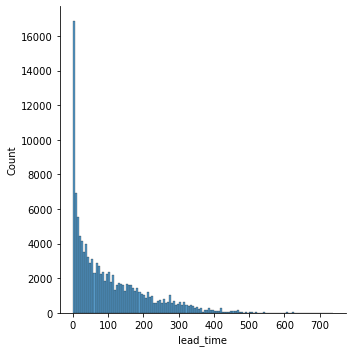

In [248]:
sns.displot(data['lead_time'])

In [249]:
def handle_outlier(col):
    data[col] =  np.log1p(data[col])

In [250]:
handle_outlier('lead_time')

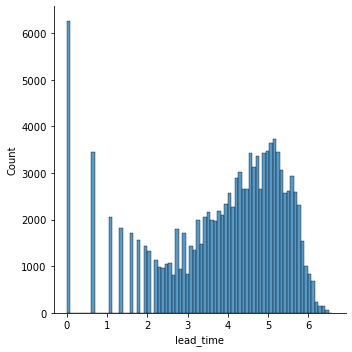

In [251]:
sns.displot(data['lead_time'])

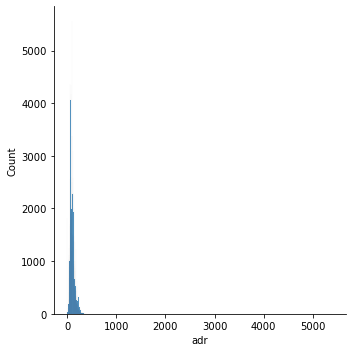

In [252]:
sns.displot(data['adr'])

In [253]:
data[data['adr'] < 0]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,...,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,weekend_or_weekday
14969,0,5.278115,2017,March,10,5,4,6,1,0,...,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,0.328767,0.378171


In [254]:
handle_outlier('adr')

In [255]:
data['adr'].isnull().sum()

1

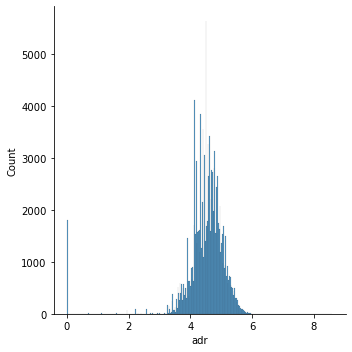

In [256]:
sns.displot(data['adr'].dropna())

Detemining usefullness of features

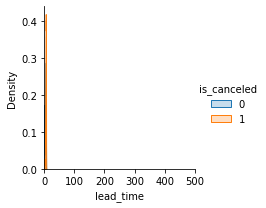

In [257]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

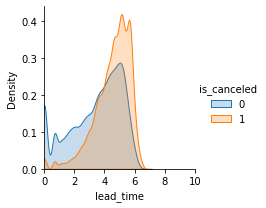

In [258]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,10)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [259]:
corr = data.corr()

In [260]:
corr['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
reservation_status                1.000000
reservation_status_date           0.488307
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
weekend_or_weekday                0.073162
reserved_room_type                0.072769
days_in_waiting_list              0.054301
meal                              0.050584
total_customers                   0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_date_day_of_month        -0.005948
deposit_giv

Removing features close to 1 and close to 0
We remove close to 1 as the data is irrelavent, we remove close to 0 to prevent overfitting

In [261]:
remove = ['arrival_date_week_number','arrival_date_year','stays_in_weekend_nights','arrival_date_day_of_month','is_family','reservation_status', 'reservation_status_date']
data.drop(remove,axis=1,inplace=True)

In [262]:
corr = data.corr()
corr['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
weekend_or_weekday                0.073162
reserved_room_type                0.072769
days_in_waiting_list              0.054301
meal                              0.050584
total_customers                   0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
deposit_given                    -0.011345
previous_bookings_not_canceled   -0.057365
is_repeated_guest                -0.083745
booking_changes                  -0.144832
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_ca

Splitting dependednt and independent variables
applying feature selection algorithm

In [263]:
data.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
total_customers                   0
total_nights                      0
deposit_given                     0
hotel                             0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
weekend_or_weekday                0
dtype: int64

In [264]:
data.dropna(inplace=True)

In [265]:
X = data.drop('is_canceled',axis=1)

In [266]:
monthMap = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6, 'August':7, 'September':8, 'October':9, 'November':10, 'December':11}
X["arrival_date_month"] = X["arrival_date_month"].map(monthMap)
X

,lead_time,arrival_date_month,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,...,deposit_given,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,weekend_or_weekday
0,5.837730,6,0,0,0,0,3,0,0.000000,0,...,0,0.277674,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.035659
1,6.603944,6,0,0,0,0,4,0,0.000000,0,...,0,0.277674,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.035659
2,2.079442,6,1,0,0,0,0,0,4.330733,0,...,0,0.277674,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.379746
3,2.639057,6,1,0,0,0,0,0,4.330733,0,...,0,0.277674,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0.379746
4,2.708050,6,2,0,0,0,0,0,4.595120,0,...,0,0.277674,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.379746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,3.178054,7,5,0,0,0,0,0,4.576153,0,...,0,0.417859,0.374106,0.202391,0.343313,0.410598,0.391567,0.445055,0.407864,0.378171
119386,4.634729,7,5,0,0,0,0,0,5.422436,0,...,0,0.417859,0.374106,0.185848,0.367590,0.410598,0.292683,0.251603,0.407864,0.378171
119387,3.555348,7,5,0,0,0,0,0,5.067079,0,...,0,0.417859,0.374106,0.167193,0.367590,0.410598,0.318108,0.251373,0.407864,0.378171
119388,4.700480,7,5,0,0,0,0,0,4.657763,0,...,0,0.417859,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.378171


In [267]:
y = data['is_canceled']

In [268]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [269]:
##Lasso(alpha=.005)

In [270]:
feature_selection_model = SelectFromModel(Lasso(alpha=.005))

In [271]:
feature_selection_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [272]:
feature_selection_model.get_support()

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False, False,  True, False])

In [273]:
cols = X.columns
cols

Index(['lead_time', 'arrival_date_month', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customers', 'total_nights',
       'deposit_given', 'hotel', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'weekend_or_weekday'],
      dtype='object')

In [274]:
cols[feature_selection_model.get_support()]

Index(['lead_time', 'arrival_date_month', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customers', 'total_nights',
       'country', 'market_segment', 'customer_type'],
      dtype='object')

In [275]:
selected_feature_list = cols[feature_selection_model.get_support()]

In [276]:
X = X[selected_feature_list]
X

,lead_time,arrival_date_month,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customers,total_nights,country,market_segment,customer_type
0,5.837730,6,0,0,3,0,0.000000,0,0,2.0,0,0.562958,0.153712,0.407864
1,6.603944,6,0,0,4,0,0.000000,0,0,2.0,0,0.562958,0.153712,0.407864
2,2.079442,6,0,0,0,0,4.330733,0,0,1.0,1,0.202310,0.153712,0.407864
3,2.639057,6,0,0,0,0,4.330733,0,0,1.0,1,0.202310,0.187618,0.407864
4,2.708050,6,0,0,0,0,4.595120,0,1,2.0,2,0.202310,0.367590,0.407864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,3.178054,7,0,0,0,0,4.576153,0,0,2.0,7,0.202391,0.343313,0.407864
119386,4.634729,7,0,0,0,0,5.422436,0,2,3.0,7,0.185848,0.367590,0.407864
119387,3.555348,7,0,0,0,0,5.067079,0,4,2.0,7,0.167193,0.367590,0.407864
119388,4.700480,7,0,0,0,0,4.657763,0,0,2.0,7,0.202310,0.367590,0.407864


In [277]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119209, dtype: int64

Split the data

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
(x_train, x_test, y_train, y_test) = train_test_split(X,y,train_size=.7)

In [280]:
x_train

,lead_time,arrival_date_month,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customers,total_nights,country,market_segment,customer_type
84897,1.945910,1,0,0,0,0,4.396915,0,0,2.0,7,0.167193,0.343313,0.407864
97653,2.708050,8,0,0,0,0,5.039417,0,1,3.0,5,0.167193,0.367590,0.407864
7815,4.753590,7,0,0,0,0,5.273000,0,0,3.0,3,0.202310,0.367590,0.254504
78527,1.098612,9,0,0,0,0,4.676560,0,0,1.0,2,0.373537,0.343313,0.407864
11426,2.890372,4,0,0,0,0,4.234107,0,1,2.0,3,0.562958,0.367590,0.407864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34840,0.693147,3,0,0,1,0,0.000000,0,0,1.0,1,0.562958,0.153712,0.407864
39729,3.401197,7,0,0,0,0,5.110239,0,0,2.0,7,0.202310,0.343313,0.101045
4626,4.672829,2,0,0,0,0,4.442651,0,0,2.0,4,0.562958,0.611086,0.407864
2107,3.931826,9,0,0,0,0,4.160132,0,2,2.0,7,0.202310,0.343313,0.407864


In [281]:
x_test

,lead_time,arrival_date_month,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customers,total_nights,country,market_segment,customer_type
46861,3.526361,0,0,0,0,0,3.969726,0,0,2.0,1,0.562958,0.367590,0.407864
7602,5.680173,7,0,0,0,0,5.442418,0,2,4.0,3,0.562958,0.367590,0.407864
100644,5.198497,9,0,0,2,0,4.615912,0,2,2.0,3,0.354427,0.343313,0.407864
47219,5.043425,1,0,0,0,0,4.143135,0,1,2.0,3,0.562958,0.343313,0.407864
71597,4.025352,6,0,0,0,0,4.962845,0,1,2.0,5,0.354427,0.367590,0.407864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16886,5.407172,8,0,0,0,0,4.394449,0,0,2.0,2,0.254322,0.611086,0.407864
72396,5.164786,6,0,0,0,0,4.338597,0,0,1.0,1,0.562958,0.343313,0.407864
4687,4.343805,2,0,0,0,0,4.043051,0,0,2.0,3,0.562958,0.367590,0.407864
45620,4.394449,10,0,0,0,0,4.196450,0,1,2.0,3,0.247972,0.367590,0.407864


Train logistic regression model

In [282]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [283]:
model = LR.fit(X=x_train,y=y_train)

In [284]:
y_hat = model.predict(x_test)

In [285]:
y_hat

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [286]:
y_test

46861     1
7602      1
100644    0
47219     0
71597     1
         ..
16886     0
72396     1
4687      1
45620     0
52950     1
Name: is_canceled, Length: 35763, dtype: int64

In [287]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_true=y_test,y_pred=y_hat)
accuracy = accuracy_score(y_true=y_test,y_pred=y_hat)
f1 = f1_score(y_true=y_test,y_pred=y_hat)

In [288]:
cm

array([[20210,  2275],
       [ 4753,  8525]], dtype=int64)

In [289]:
accuracy

0.803484047758857

In [290]:
f1

0.7081152919677715

In [291]:
from sklearn.model_selection import cross_val_score

In [292]:
score = cross_val_score(model,X,y,cv=10)
score

array([0.7969969 , 0.76277158, 0.83516484, 0.73643151, 0.74037413,
       0.732405  , 0.74180018, 0.80806979, 0.78961497, 0.83842282])

In [293]:
score.mean()

0.7782051708985722

implementing multiple ml algorithms

In [294]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [295]:
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive bayes',GaussianNB()))
models.append(('KNearestNeighbors',KNeighborsClassifier()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('DecisionTree',DecisionTreeClassifier()))

In [296]:
for name, model in models:
    print(name)
    model.fit(x_train,y_train)
    
    predictions = model.predict(x_test)
    
    print(confusion_matrix(predictions,y_test))
    print(accuracy_score(predictions,y_test))
    print("---------------------------------------")

LogisticRegression
[[20210  4753]
 [ 2275  8525]]
0.803484047758857
---------------------------------------
Naive bayes
[[ 4883   343]
 [17602 12935]]
0.49822442188854404
---------------------------------------
KNearestNeighbors
[[19811  3979]
 [ 2674  9299]]
0.8139697452674551
---------------------------------------
RandomForest
[[20717  2689]
 [ 1768 10589]]
0.8753739898778067
---------------------------------------
DecisionTree
[[19399  2831]
 [ 3086 10447]]
0.8345496742443307
---------------------------------------
